João Inácio Scrimini - 202370701

Usei o VS Code, com diretório direto do ambiente em que estava o arquivo.

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
banco = pd.read_csv("WDIData.csv", sep=',')
banco.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN,NaN


Selecionando as variáveis (indicadores) e os países da América do Sul:

In [244]:
banco1=banco[banco['Indicator Name'].isin(['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 
                                                            'GDP per capita growth (annual %)', 'Inflation, consumer prices (annual %)', 
                                                            'Life expectancy at birth, total (years)'])]
banco2=banco1[banco1['Country Code'].isin(['ARG', 'BOL', 'BRA' , 'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN'])]
banco2.drop(['Country Name','Indicator Code'], axis=1, inplace=True) # Retirando as colunas desnecessárias 
banco2.reset_index( inplace=True, drop=True ) # Redefinindo o index do dataset
banco2.head()

C:\Users\joaoi\AppData\Local\Temp\ipykernel_16404\2677579501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco2.drop(['Country Name','Indicator Code'], axis=1, inplace=True) # Retirando as colunas desnecessárias


,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,ARG,"Cause of death, by communicable diseases and m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.100000,NaN,NaN,NaN,NaN,15.500000,15.900000,NaN,NaN,NaN
1,ARG,GDP per capita growth (annual %),NaN,3.747273,-2.410454,-6.771626,8.464397,8.934659,-2.089312,1.73649,...,8.991438,4.902125,-2.060575,1.338453,-3.514196,1.698945,-2.784592,1.870295,NaN,NaN
2,ARG,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,"Life expectancy at birth, total (years)",65.022,65.141000,65.233000,65.311000,65.388000,65.481000,65.603000,65.76000,...,75.595000,75.761000,75.926000,76.089000,76.252000,76.415000,76.577000,76.738000,NaN,NaN
4,BOL,"Cause of death, by communicable diseases and m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.000000,NaN,NaN,NaN,NaN,23.100000,22.400000,NaN,NaN,NaN


Selecionando apenas as séries com pelo menos 20 observações presentes:

In [245]:
banco_filtrado=banco2[banco2.iloc[:, 2:].notnull().sum(axis=1) >= 20]
banco_filtrado.reset_index( inplace=True, drop=True ) # Redefinindo o index do dataset
banco_filtrado.head()

,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,ARG,GDP per capita growth (annual %),NaN,3.747273,-2.410454,-6.771626,8.464397,8.934659,-2.089312,1.736490,...,8.991438,4.902125,-2.060575,1.338453,-3.514196,1.698945,-2.784592,1.870295,NaN,NaN
1,ARG,"Life expectancy at birth, total (years)",65.022000,65.141000,65.233000,65.311000,65.388000,65.481000,65.603000,65.760000,...,75.595000,75.761000,75.926000,76.089000,76.252000,76.415000,76.577000,76.738000,NaN,NaN
2,BOL,GDP per capita growth (annual %),NaN,0.154140,3.563011,4.742723,1.938813,2.858442,5.052350,4.198039,...,2.452274,3.532858,3.472793,5.140099,3.844088,3.267949,2.701313,2.651663,NaN,NaN
3,BOL,"Inflation, consumer prices (annual %)",11.533153,7.561493,5.879331,-0.706357,10.181818,2.860286,6.951872,11.200000,...,2.503276,9.884464,4.515603,5.736400,5.766601,4.059610,3.623214,2.822758,NaN,NaN
4,BOL,"Life expectancy at birth, total (years)",42.138000,42.454000,42.778000,43.110000,43.451000,43.800000,44.157000,44.523000,...,66.408000,66.945000,67.451000,67.922000,68.357000,68.756000,69.125000,69.473000,NaN,NaN


1. Histograma

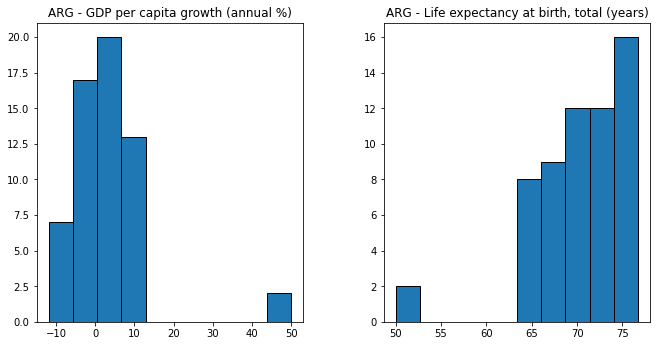

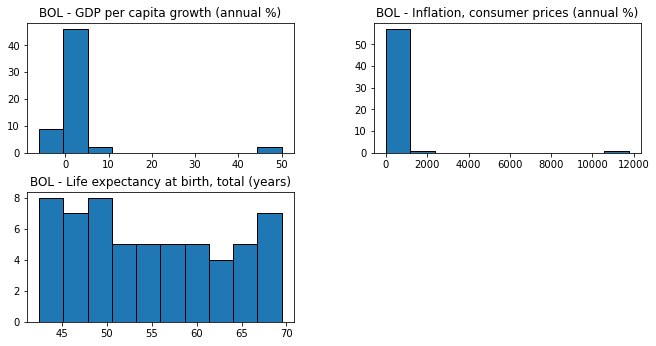

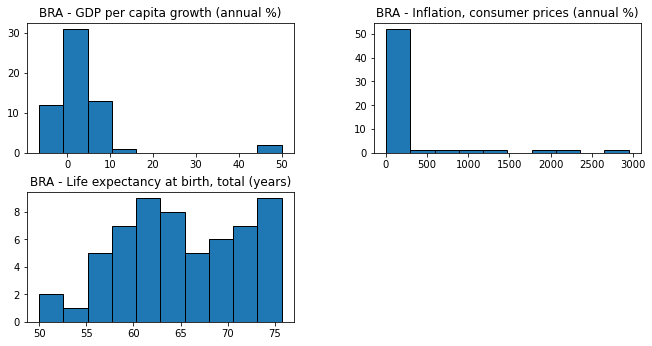

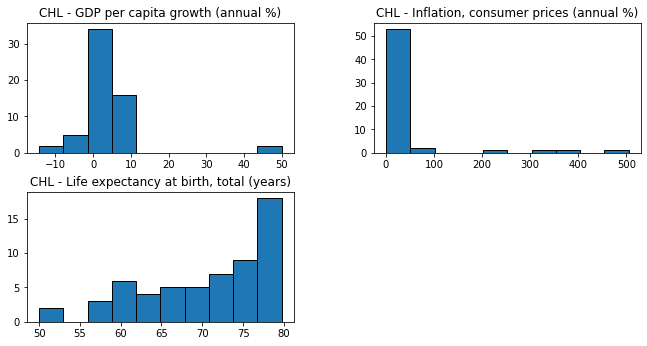

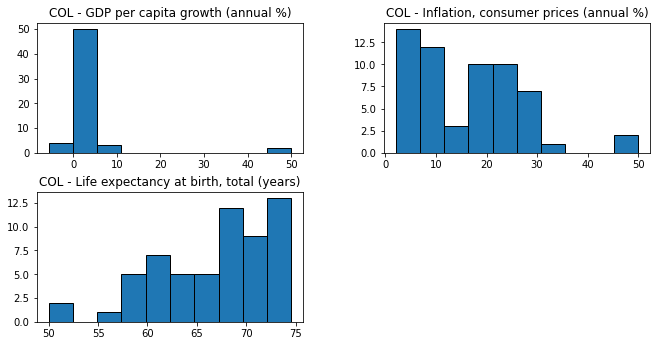

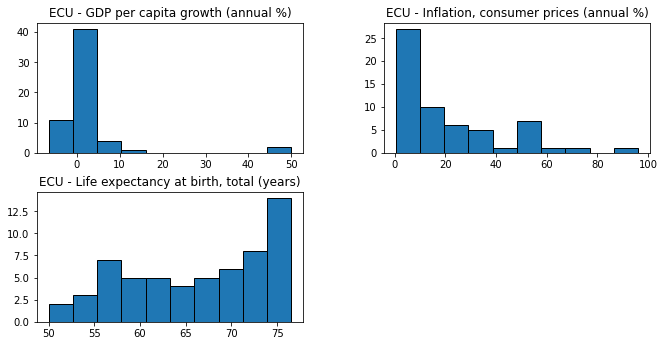

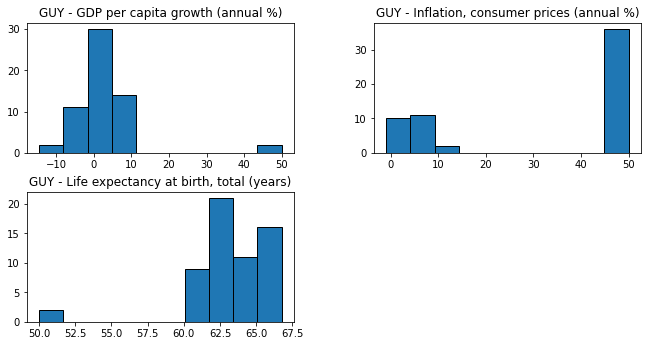

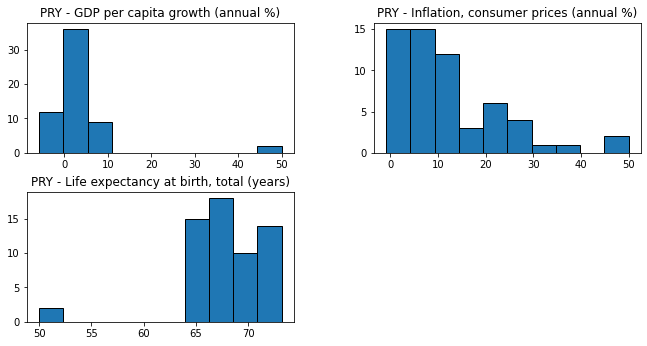

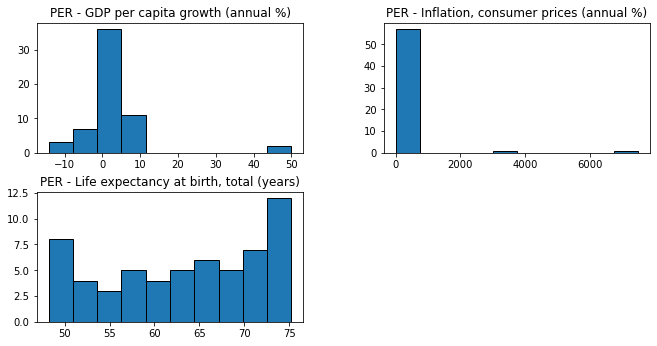

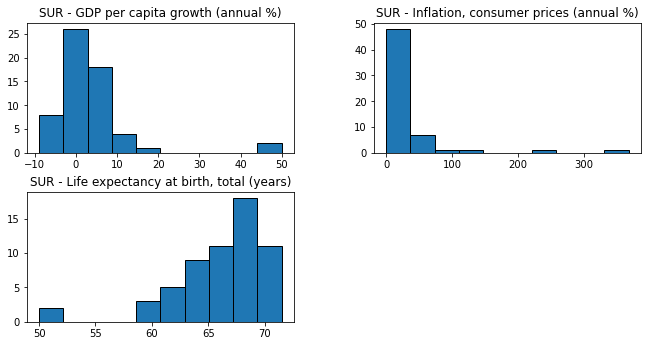

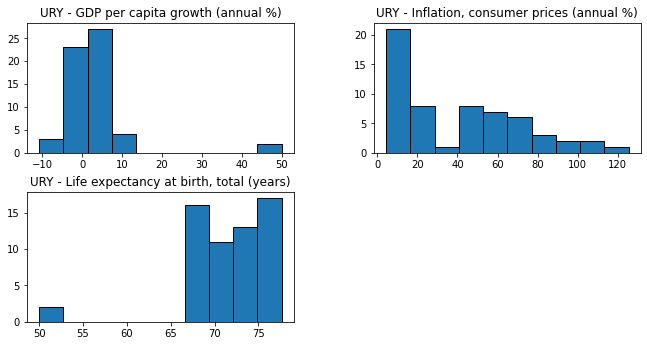

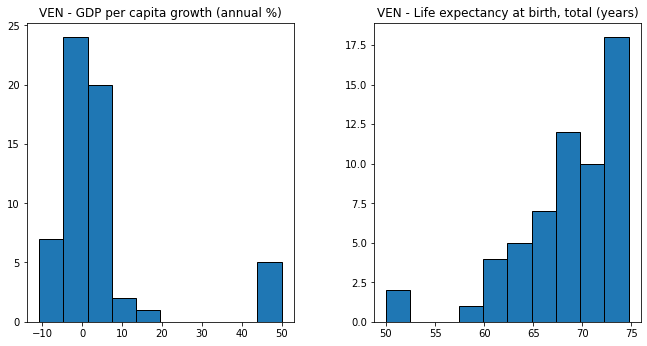

In [246]:
paises=list(banco_filtrado['Country Code'].unique())
for pais in paises:
    ind_pais=banco_filtrado[ banco_filtrado['Country Code']==pais].copy()
    ind_pais['Indicator Name']=ind_pais['Country Code']+' - '+ind_pais['Indicator Name']
    ind_pais=ind_pais.iloc[:,1:].T
    ind_pais.columns=list(ind_pais.iloc[0,:])
    ind_pais=ind_pais.iloc[2:,:]
    ind_pais.fillna(50,inplace=True)
    ind_pais.dropna().hist(figsize=(11,5.5),grid=False,edgecolor='black')

2. Boxplot

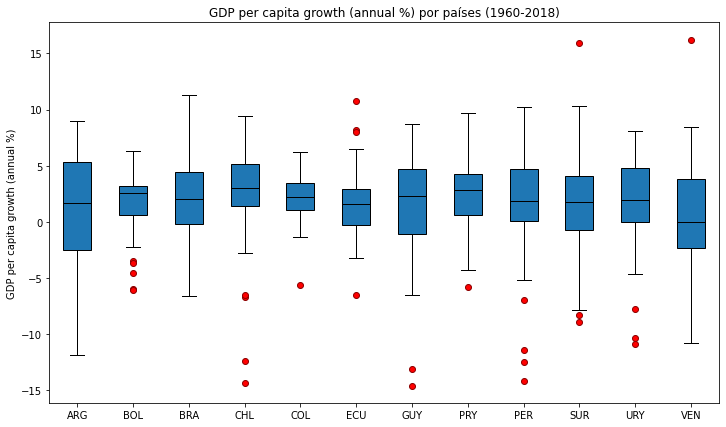

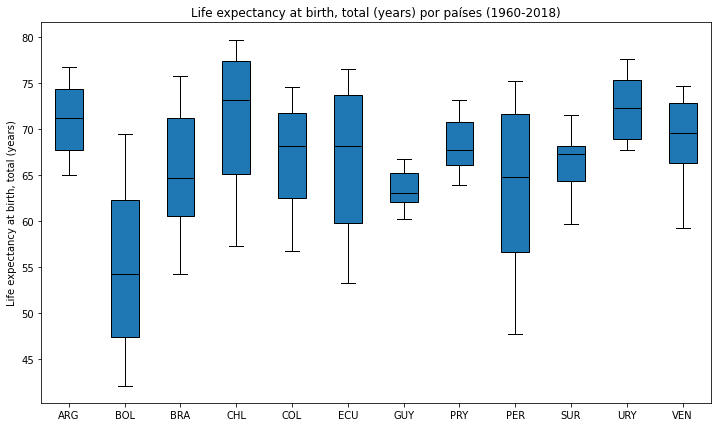

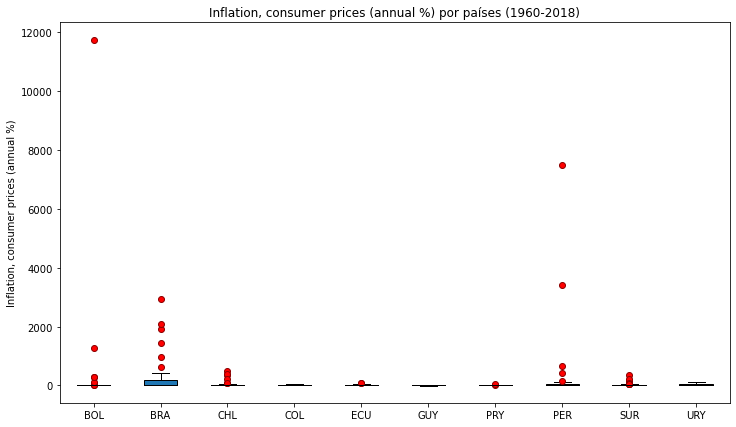

In [247]:
indc=list(banco_filtrado['Indicator Name'].unique())
for ind in indc:
    banc=banco_filtrado[banco_filtrado['Indicator Name']==ind].T.copy()
    banc.columns=list(banc.iloc[0,:])
    banc=banc.iloc[2:,:]
    plt.figure(figsize=(12, 7))
    banc.apply(pd.to_numeric).boxplot(grid=False,patch_artist=True, vert=True, boxprops=dict(color="black"),
                                                whiskerprops=dict(color="black"), medianprops=dict(color="black"),
                                                flierprops=dict(markerfacecolor='red',markeredgecolor='darkred'))
    plt.ylabel(ind)
    plt.title(ind + ' por países (1960-2018)')
    plt.show()

3. Um gráfico de correlação entre os indicadores 2 e 3

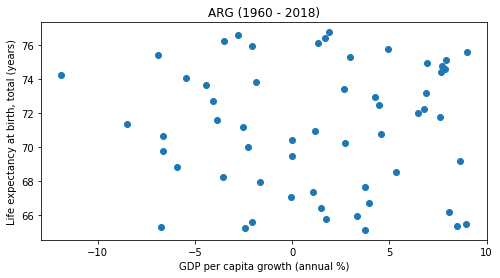

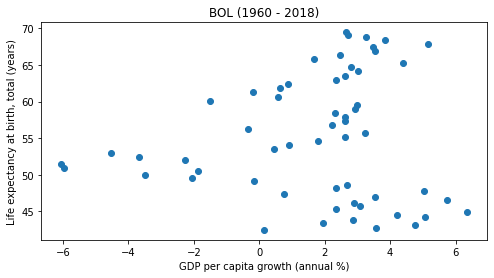

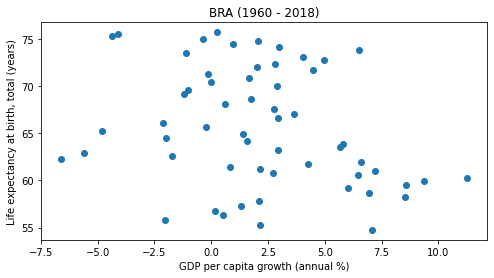

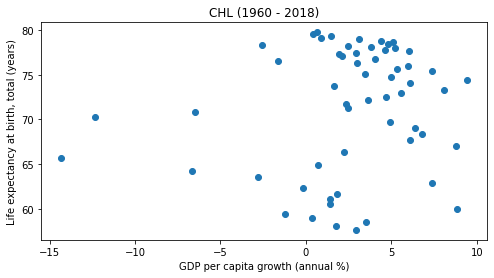

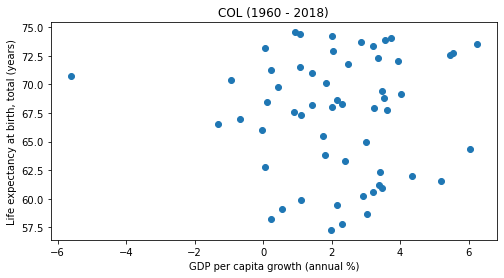

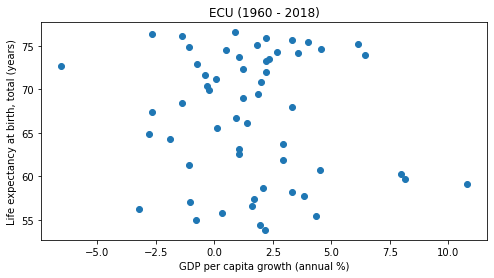

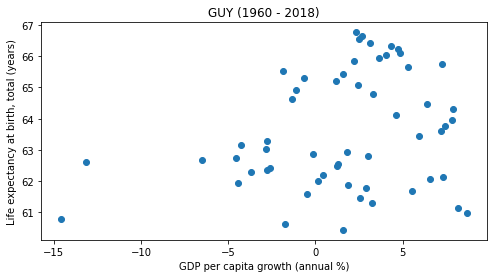

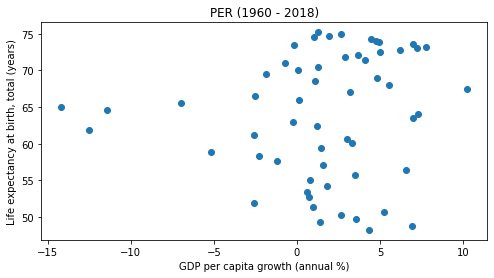

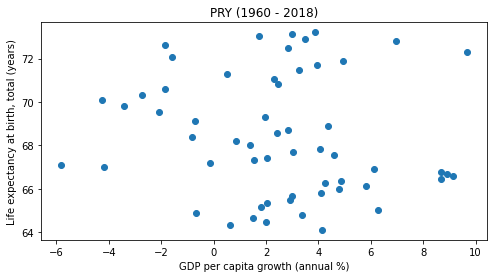

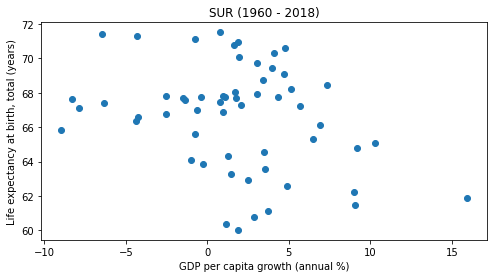

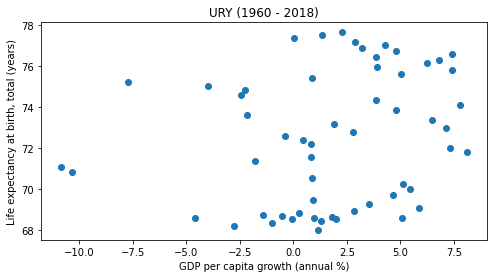

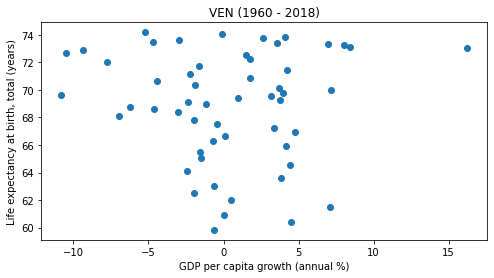

In [248]:
filtro=banco_filtrado.groupby('Country Code')['Indicator Name'].apply(set).apply(lambda x: indc[0] in x and indc[1] in x)
paises=filtro[filtro].index.tolist()
for pais in paises:
    ind_pais=banco_filtrado[ banco_filtrado['Country Code']==pais].copy()
    ind_pais=ind_pais.iloc[:,1:].T
    ind_pais.columns=list(ind_pais.iloc[0,:])
    ind_pais=ind_pais.iloc[2:,:]
    plt.figure(figsize=(8, 4))
    plt.scatter(x=ind_pais[indc[0]],y=ind_pais[indc[1]])
    plt.xlabel(indc[0])
    plt.ylabel(indc[1])
    plt.title(pais + " (1960 - 2018)")
    plt.show()


4. Um gráfico de correlação entre os indicadores 2 e 4

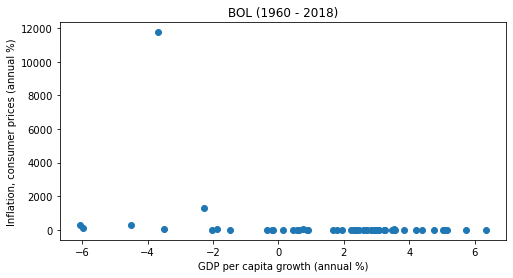

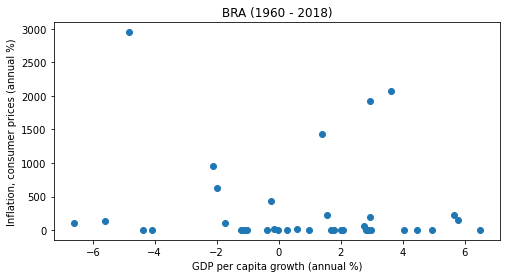

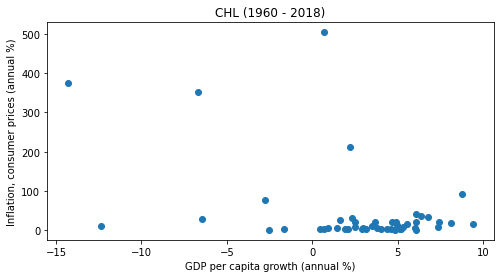

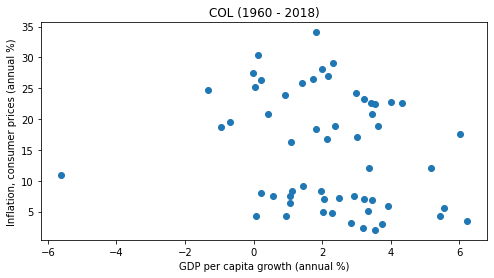

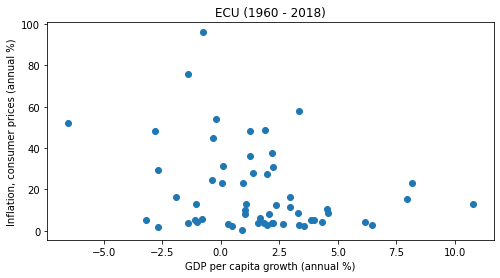

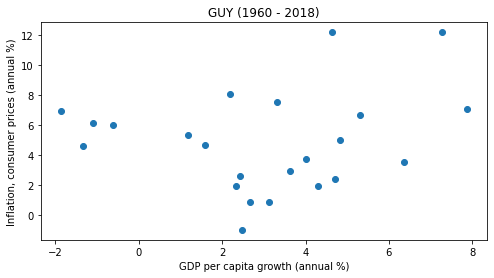

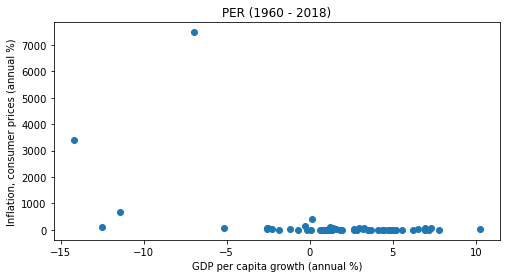

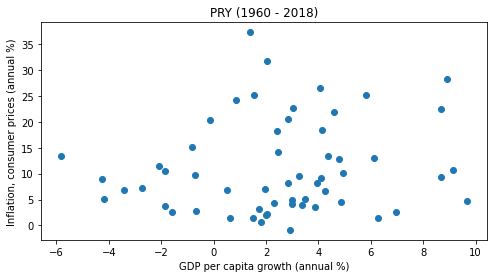

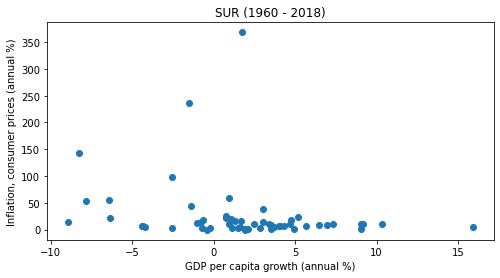

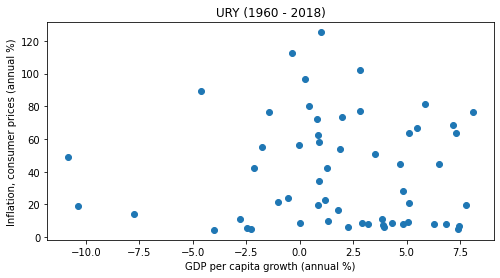

In [249]:
filtro=banco_filtrado.groupby('Country Code')['Indicator Name'].apply(set).apply(lambda x: indc[0] in x and indc[2] in x)
paises=filtro[filtro].index.tolist()
for pais in paises:
    ind_pais=banco_filtrado[ banco_filtrado['Country Code']==pais].copy()
    ind_pais=ind_pais.iloc[:,1:].T
    ind_pais.columns=list(ind_pais.iloc[0,:])
    ind_pais=ind_pais.iloc[2:,:]
    plt.figure(figsize=(8, 4))
    plt.scatter(x=ind_pais[indc[0]],y=ind_pais[indc[2]])
    plt.xlabel(indc[0])
    plt.ylabel(indc[2])
    plt.title(pais + " (1960 - 2018)")
    plt.show()